# Testing a neural network that predicts cravings FASTREAD


In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

So, Hamed, you have decided to look at my model! If you are reading this it is probably because I have not figured out how to upload it to the net. However, I can see that you are a man of science, and are willing to dive into the machine. Keep scrolling and you will see how this program unfolds.

The model has already been trained in the other ipython notebook. Here we only want to see our results.

In [60]:
from fastai.vision import *
from fastai.metrics import error_rate

In [61]:
bs = 64
# bs = 16   # uncomment this line if you run out of memory even after clicking Kernel->Restart

In [62]:
home_path = os.getcwd()

In [63]:
path = os.path.join(home_path,'jpegs'); path = Path(path)

In [64]:
path_img = path
fnames = get_image_files(path_img)

In [65]:
np.random.seed(2)
def get_labels(file_path):
    if 'Neutral' in str(file_path):
        return 'Neutral'
    else:
        return 'Craving'

Now we grab all our pictures and get them ready to interpret. These are all from your dataset of amphetamines, heroin, and neutral.

In [10]:
data = ImageDataBunch.from_name_func(path_img, fnames, label_func=get_labels, ds_tfms=get_transforms(),
                                     size=229,bs=bs//4).normalize(imagenet_stats)

In [29]:
learn = cnn_learner(data, models.resnet50, metrics=error_rate)

In [58]:
learn.load('stage-2-neutralvcravings');

In [32]:
homepath = path.parents[0]

In [33]:
testdir = homepath / 'Test'

In [34]:
get_image_files(testdir)

[PosixPath('/home/ubuntu/Cravings_net/Test/Neutral2saffron.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/Test/Neutral3saffron.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/Test/Amphetamine.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/Test/amphetamine-powder.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/Test/Neutral1saffron.jpg'),
 PosixPath('/home/ubuntu/Cravings_net/Test/amphetamine.jpg')]

In [35]:
funny_data = ImageList.from_folder(testdir)

In [37]:
data.add_test(funny_data)

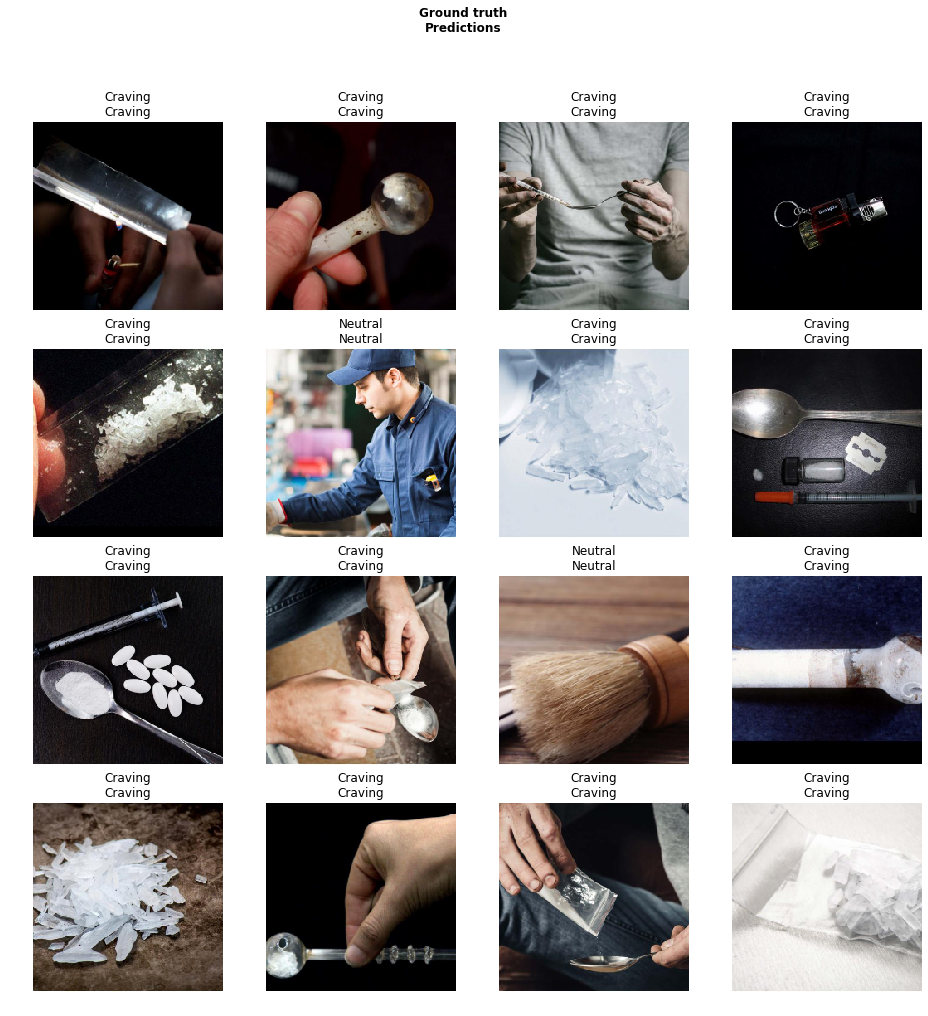

In [69]:
learn.show_results(rows = 8)

In [70]:
interp = ClassificationInterpretation.from_learner(learn);


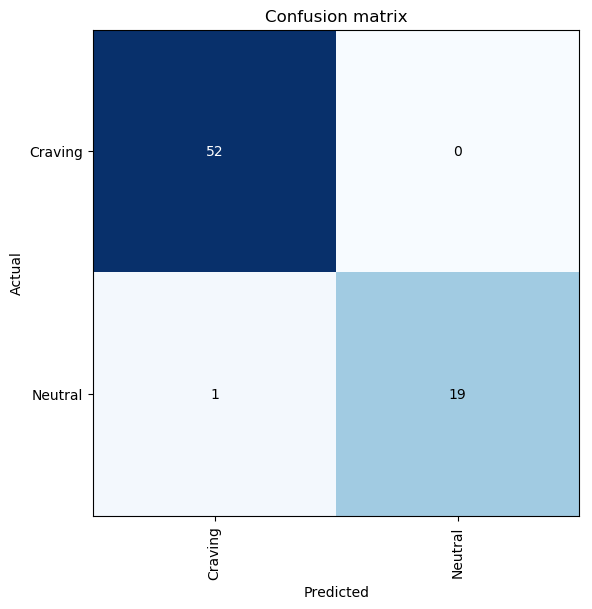

In [72]:
interp.plot_confusion_matrix(figsize=(6,6), dpi=100)

Let's see where the model does poorly. We only had 1 error - that's great!

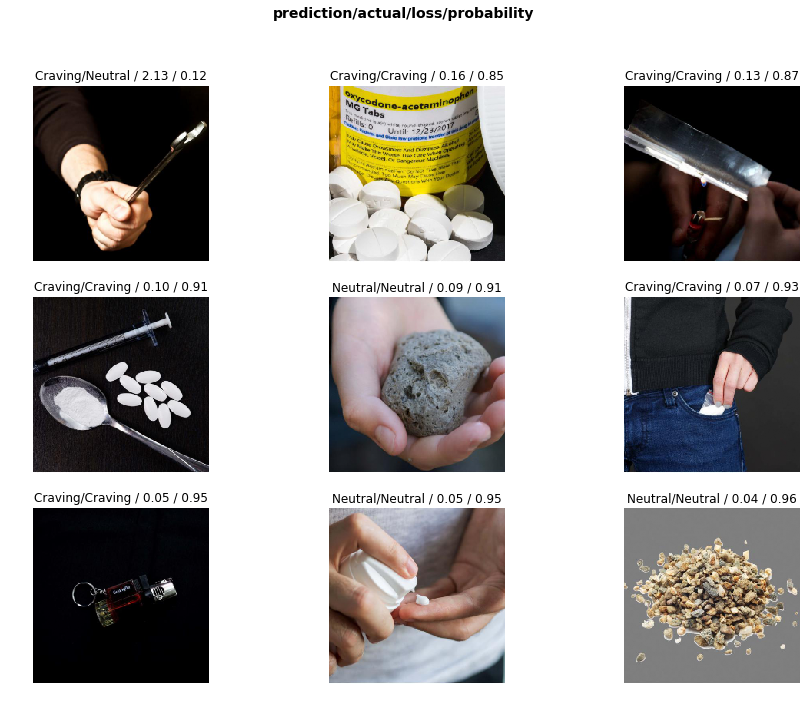

In [71]:
interp.plot_top_losses(9, figsize=(15,11),heatmap=False)

In [38]:
predictions, *_ = learn.get_preds(DatasetType.Test)

labels = np.argmax(predictions, 1)

And as a last run we test our model on a small dataset of 6 images. 3 are of saffron, 3 are of amphetamine powder. Our model's prediction is above the image.

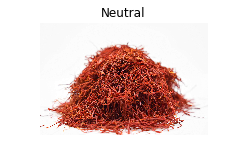

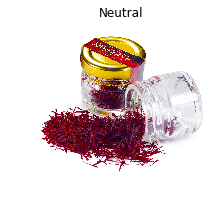

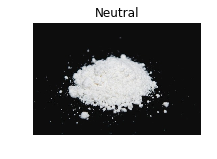

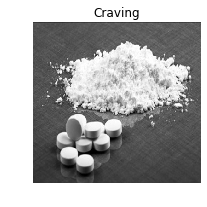

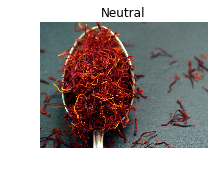

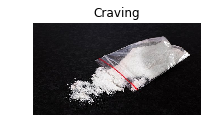

In [59]:
for picture in data.test_ds.x:
    picture.show(title = str(learn.predict(picture)[0]))